






### Instruction
Spam filtering is a beginner’s example of the document classification task which involves classifying an email as spam or non-spam (a.k.a. ham) mail. An email dataset will be provided. We will use the following steps to build this application:
1) Preparing the text data
2) Creating a word dictionary
3) Feature extraction
4) Training the classifier
5) Checking the results on the test set

### Preparing the text data
The data-set used here, is split into a training set and a test set containing 702 mails and 260 mails respectively, divided equally between spam and ham mails. You will easily recognize spam mails as it contains `spmsg` in its filename.

In any text mining problem, text cleaning is the first step where we remove those words from the document which may not contribute to the information we want to extract. Emails may contain a lot of undesirable characters like punctuation marks, stop words, digits, etc which may not be helpful in detecting the spam email. The emails in Ling-spam corpus have been already preprocessed in the following ways:

1. **Removal of stop words** – Stop words like “and”, “the”, “of”, etc are very common in all English sentences and are not very meaningful in deciding spam or legitimate status, so these words have been removed from the emails.

2. **Lemmatization** – It is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. For example, “include”, “includes,” and “included” would all be represented as “include”. The context of the sentence is also preserved in lemmatization as opposed to stemming (another buzz word in text mining which does not consider meaning of the sentence)

We still need to remove the non-words like punctuation marks or special characters from the mail documents. There are several ways to do it. Here, we will remove such words after creating a dictionary, which is a very convenient method to do so since when you have a dictionary; you need to remove every such word only once.

### Creating word dictionary
We will only perform text analytics on the content to detect the spam mails. As the first step, we need to create a dictionary of words and their frequency. For this task, a training set of 700 mails is utilized. This python function will create the dictionary for you.
```Python
def make_Dictionary(train_dir):
    emails = [os.path.join(train_dir,f) for f in os.listdir (train_dir)]
    all_words = []
    for mail in emails:
        with open (mail) as m:
            for i,line in enumerate (m) :
                if i == 2:
                    words = line.split()
                    all_words += words
    dictionary = Counter(all_words)
    # Paste code for non-word removal here
    
    return dictionary
```

Once the dictionary is created we can add just a few lines of code written below to the above function to remove non-words. Absurd single characters in the dictionary which are irrelevant here are also removed. Do not forget to insert the below code in the function of make_Dictionary:
```python
list_to_remove = list(dictionary.keys())
for item in list_to_remove:
    if item.isalpha() == False:
        del dictionary[item]
    elif len(item) == 1:
        del dictionary[item]
dictionary = dictionary.most_common(3000)
```

In [501]:
import os
import numpy as np
from collections import Counter
def make_Dictionary(train_dir):
    emails = [os.path.join(train_dir,f) for f in os.listdir (train_dir)]
    all_words = []
    for mail in emails:
        with open (mail) as m:
            for i,line in enumerate (m) :
                if i == 2:
                    words = line.split()
                    all_words += words
    dictionary = Counter(all_words)
    list_to_remove = list(dictionary.keys())
    for item in list_to_remove:
        if item.isalpha() == False:##judge whether dictionary contains non-words
            del dictionary[item]
        elif len(item) == 1:
            del dictionary[item]
    dictionary = dictionary.most_common(3000)
    # Paste code for non-word removal here
    return dictionary

In [11]:
# import os
# from collections import Counter
# files=open('ling-spam/train-mails/3-1msg1.txt','r')
# all_words=[]
# for i,line in enumerate(files):
#     print(f'{i}: {line}')
#     words=line.split()
#     print(words)
#     all_words+=words

# dictionary=Counter(all_words)
# print('dictionary:',dictionary)
# list_to_remove = list(dictionary.keys())
# print('list_to_remove:',list_to_remove)
# for item in list_to_remove:
#         if item.isalpha() == False:##judge whether dictionary contains non-word
#             del dictionary[item]
#         elif len(item) == 1:
#             del dictionary[item]
# removed_list=list(dictionary.keys())
# print('removed_list:',list(dictionary.keys()))
# for item in removed_list:
#     count=0
#     if item.isalpha()==False:
#         count=count+1
# print(count)

    

0: Subject: re : 2 . 882 s - > np np

['Subject:', 're', ':', '2', '.', '882', 's', '-', '>', 'np', 'np']
1: 

[]
2: > deat : sun , 15 dec 91 2 : 25 : 2 est > : michael < mmorse @ vm1 . yorku . ca > > subject : re : 2 . 864 query > > wlodek zadrozny ask " anything interest " > construction " s > np np " . . . second , > much relate : consider construction form > discuss list late reduplication ? > logical sense " john mcnamara name " tautologous thus , > level , indistinguishable " , , here ? " . ' john mcnamara name ' tautologous support those logic-base semantics irrelevant natural language . sense tautologous ? supplies value attribute follow attribute value . fact value name-attribute relevant entity ' chaim shmendrik ' , ' john mcnamara name ' false . tautology , . ( reduplication , either . )

['>', 'deat', ':', 'sun', ',', '15', 'dec', '91', '2', ':', '25', ':', '2', 'est', '>', ':', 'michael', '<', 'mmorse', '@', 'vm1', '.', 'yorku', '.', 'ca', '>', '>', 'subject', ':', 're', '

The dictionary can be seen by the command “print dictionary”. You may find some absurd word counts to be high but don’t worry, it’s just a dictionary and you always have a chance to improve it later. If you use the provided dataset, make sure your dictionary has some of the entries given below as most frequent words. Here 3000 most frequently used words are chosen in the dictionary.

In [502]:
# To show the most frequent words in train-mails
dictionary = make_Dictionary('ling-spam/train-mails')
dictionary

[('order', 1414),
 ('address', 1293),
 ('report', 1216),
 ('mail', 1127),
 ('send', 1079),
 ('language', 1072),
 ('email', 1051),
 ('program', 1001),
 ('our', 987),
 ('list', 935),
 ('one', 917),
 ('name', 878),
 ('receive', 826),
 ('money', 788),
 ('free', 762),
 ('work', 755),
 ('information', 677),
 ('business', 654),
 ('please', 652),
 ('university', 595),
 ('us', 564),
 ('day', 556),
 ('follow', 544),
 ('internet', 520),
 ('over', 511),
 ('http', 479),
 ('check', 472),
 ('call', 469),
 ('each', 466),
 ('include', 452),
 ('com', 448),
 ('linguistic', 442),
 ('number', 423),
 ('want', 420),
 ('letter', 419),
 ('need', 418),
 ('many', 412),
 ('here', 397),
 ('market', 395),
 ('start', 390),
 ('even', 386),
 ('fax', 383),
 ('form', 380),
 ('most', 377),
 ('first', 373),
 ('web', 366),
 ('service', 363),
 ('interest', 362),
 ('software', 352),
 ('remove', 349),
 ('read', 347),
 ('those', 345),
 ('week', 344),
 ('every', 332),
 ('credit', 329),
 ('ll', 326),
 ('site', 320),
 ('much', 31

In [503]:
words_frequency=np.zeros((len(dictionary)))
total_times=0
for i in range(0,len(dictionary)):
    words_frequency[i]=dictionary[i][1]
    total_times=total_times+dictionary[i][1]
words_frequency=words_frequency/total_times
words_frequency

array([9.28753933e-03, 8.49277818e-03, 7.98702109e-03, ...,
       5.25461914e-05, 5.25461914e-05, 5.25461914e-05])

### Feature Extraction Process
Once the dictionary is ready, we can extract word count vector (our feature here) of 3000 dimensions for each email of the training set. Each **word count vector** contains the frequency of 3000 words in the training file. Of course you might have guessed by now that most of them will be zero. Let us take an example. Suppose we have 500 words in our dictionary. Each word count vector contains the frequency of 500 dictionary words in the training file. Suppose the text in the training file is “Get the work done, work done”, then it will be encoded as $$[0,0,0,0,0,…….0,0,2,0,0,0,……,0,0,1,0,0,…0,0,1,0,0,……2,0,0,0,0,0]$$ Here, all the word counts are placed at the 296th, 359th, 415th, 495th elements of the word count vector in the length of 500 and the rest are zero.

The below python code will generate a feature vector matrix whose rows denote 700 files of the training set and columns denote 3000 words of the dictionary. The value at index ${ij}$ will be the number of occurrences of the $j^{th}$ word of the dictionary in the $i^{th}$ file

In [504]:
def extract_features(mail_dir):
    files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]
    features_matrix = np.zeros((len(files),3000))
    docID = 0
    _i = 0
    print(len(files))
    for fil in files:
        _i+=1
        with open(fil) as fi:
            for i,line in enumerate(fi):
                if i == 2:
                    words = line.split()
                    for word in words:
                        wordID = 0
                        for i,d in enumerate(dictionary):
                            if d[0] == word:
                                wordID = i
                                features_matrix[docID,wordID]+=1
            docID = docID + 1
        print('\r','done {} files'.format(_i),flush=True,end='')
    return features_matrix

In [505]:
features_matrix = extract_features("ling-spam/train-mails")
features_matrix

702
 done 1 files

 done 702 files

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [506]:
import os
import numpy as np
def extract_labels(mail_dir):
    files=[os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]
    labels=np.zeros((len(files)))
    i=0
    for fil in files:
        if(fil.__contains__('spmsg')):
            labels[i]=0
        else:
            labels[i]=1
        i=i+1
    return labels
# 1 represents the mail is non-spam while 0 represents the mail is spam

labels=extract_labels("ling-spam/train-mails")
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### Training the Classifiers
Here you should write your Naïve Bayes classifiers after fully understanding its principle.

In [507]:
########### Write Your Code Here ###########
import pandas as pd



#prepare X_train
X_train=pd.DataFrame(features_matrix,columns=dictionary)

X_train

############################################

,"(order, 1414)","(address, 1293)","(report, 1216)","(mail, 1127)","(send, 1079)","(language, 1072)","(email, 1051)","(program, 1001)","(our, 987)","(list, 935)",...,"(urbana, 8)","(guest, 8)","(adam, 8)","(learnability, 8)","(mellon, 8)","(vincent, 8)","(negotiation, 8)","(authentic, 8)","(assemble, 8)","(ensure, 8)"
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,2.0,4.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
700,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [508]:
column_names=X_train.columns
column_names

Index([    ('order', 1414),   ('address', 1293),    ('report', 1216),
            ('mail', 1127),      ('send', 1079),  ('language', 1072),
           ('email', 1051),   ('program', 1001),        ('our', 987),
             ('list', 935),
       ...
             ('urbana', 8),        ('guest', 8),         ('adam', 8),
       ('learnability', 8),       ('mellon', 8),      ('vincent', 8),
        ('negotiation', 8),    ('authentic', 8),     ('assemble', 8),
             ('ensure', 8)],
      dtype='object', length=3000)

In [509]:
len(column_names)

3000

In [510]:
column_names[0]

('order', 1414)

In [511]:
len(features_matrix[:,0])

702

In [512]:
for i in range(0,len(column_names)):
    X_train[column_names[i]]=np.sqrt(X_train[column_names[i]])

In [513]:
X_train

,"(order, 1414)","(address, 1293)","(report, 1216)","(mail, 1127)","(send, 1079)","(language, 1072)","(email, 1051)","(program, 1001)","(our, 987)","(list, 935)",...,"(urbana, 8)","(guest, 8)","(adam, 8)","(learnability, 8)","(mellon, 8)","(vincent, 8)","(negotiation, 8)","(authentic, 8)","(assemble, 8)","(ensure, 8)"
0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.000000,1.414214,2.0,0.0,0.0,1.732051,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
698,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.414214,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
699,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.414214,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
700,0.0,0.0,0.0,1.414214,1.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [514]:
#Data cleaning

#convert data types
from matplotlib import pyplot as plt
import seaborn as sns


features_matrix=features_matrix.astype('float64')

#Handling the null/missing values
#X_train.isnull().sum()


#Outliers Treatment
# for i in range(0,len(column_names)):
#     X_train[column_names[i]]=np.sqrt(X_train[column_names[i]])
# plt.figure(1)
# plt.subplot(121)
# sns.distplot(X_train[column_names[0]]);

# plt.subplot(122)
# X_train[column_names[0]].plot.box(figsize=(16,5))
# plt.show()
# #checking the skewness, kurtosis between the original and transformed data:
# print("The skewness of the original data is {}".format(X_train[column_names[0]].skew()))
# print('The kurtosis of the original data is {}'.format(X_train[column_names[0]].kurt()))


# X_train[column_names[0]]=np.sqrt(X_train[column_names[0]])
# plt.figure(2)
# plt.subplot(121)
# sns.distplot(X_train[column_names[0]]);

# plt.subplot(122)
# X_train[column_names[0]].plot.box(figsize=(16,5))
# plt.show()
# print("The skewness of the SQRT transformed data is {}".format(X_train[column_names[0]].skew()))
# print('The kurtosis of the SQRT transformed data is {}'.format(X_train[column_names[0]].kurt()))

In [515]:
features_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [516]:
# for i in range(0,len(column_names)):
#     features_matrix[:,i]=np.sqrt(features_matrix[:,i])
features_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [517]:
features_matrix.shape

(702, 3000)

In [518]:
# #cscaling the Numerical features
from sklearn.preprocessing import StandardScaler
features_matrix=StandardScaler().fit_transform(features_matrix)

In [519]:
features_matrix

array([[-0.35139538, -0.39443783, -0.21758829, ..., -0.10736563,
        -0.06767037, -0.10736563],
       [-0.35139538, -0.39443783, -0.21758829, ..., -0.10736563,
        -0.06767037, -0.10736563],
       [-0.35139538, -0.39443783, -0.21758829, ..., -0.10736563,
        -0.06767037, -0.10736563],
       ...,
       [-0.35139538, -0.39443783, -0.21758829, ..., -0.10736563,
        -0.06767037, -0.10736563],
       [-0.35139538, -0.39443783, -0.21758829, ..., -0.10736563,
        -0.06767037, -0.10736563],
       [-0.35139538, -0.18028829, -0.21758829, ..., -0.10736563,
        -0.06767037, -0.10736563]])

In [520]:
#prepare Y_train
Y_train=pd.DataFrame(labels,columns=['not-spam'])

Y_train

,not-spam
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
697,0.0
698,0.0
699,0.0
700,0.0


In [521]:
#prepare X_test
features_matrix_test= extract_features("ling-spam/test-mails")

X_test=pd.DataFrame(features_matrix_test,columns=dictionary)
X_test

260
 done 260 files

,"(order, 1414)","(address, 1293)","(report, 1216)","(mail, 1127)","(send, 1079)","(language, 1072)","(email, 1051)","(program, 1001)","(our, 987)","(list, 935)",...,"(urbana, 8)","(guest, 8)","(adam, 8)","(learnability, 8)","(mellon, 8)","(vincent, 8)","(negotiation, 8)","(authentic, 8)","(assemble, 8)","(ensure, 8)"
0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
256,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [522]:
features_matrix_test

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [17.,  2.,  0., ...,  0.,  0.,  0.]])

In [523]:
features_matrix_test=features_matrix_test.astype('float64')
features_matrix_test

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [17.,  2.,  0., ...,  0.,  0.,  0.]])

In [524]:
for i in range(0,len(column_names)):
    X_test[column_names[i]]=np.sqrt(X_test[column_names[i]])
X_test

,"(order, 1414)","(address, 1293)","(report, 1216)","(mail, 1127)","(send, 1079)","(language, 1072)","(email, 1051)","(program, 1001)","(our, 987)","(list, 935)",...,"(urbana, 8)","(guest, 8)","(adam, 8)","(learnability, 8)","(mellon, 8)","(vincent, 8)","(negotiation, 8)","(authentic, 8)","(assemble, 8)","(ensure, 8)"
0,1.000000,0.000000,0.0,0.000000,0.0,1.732051,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,1.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.000000,0.0,0.000000,0.0,1.414214,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.414214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
256,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.732051,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [525]:

for i in range(0,len(column_names)):
    features_matrix_test[:,i]=np.sqrt(features_matrix_test[:,i])

features_matrix_test

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [4.12310563, 1.41421356, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [526]:
from sklearn.preprocessing import StandardScaler
features_matrix_test=StandardScaler().fit_transform(features_matrix_test)

In [527]:
features_matrix_test

array([[ 0.65680693, -0.66935941, -0.27089359, ...,  0.        ,
        -0.06213698, -0.1647591 ],
       [ 0.65680693,  0.38918143, -0.27089359, ...,  0.        ,
        -0.06213698, -0.1647591 ],
       [ 0.65680693, -0.66935941, -0.27089359, ...,  0.        ,
        -0.06213698, -0.1647591 ],
       ...,
       [-0.47811047, -0.66935941, -0.27089359, ...,  0.        ,
        -0.06213698, -0.1647591 ],
       [-0.47811047, -0.66935941, -0.27089359, ...,  0.        ,
        -0.06213698, -0.1647591 ],
       [ 4.20127385,  0.8276434 , -0.27089359, ...,  0.        ,
        -0.06213698, -0.1647591 ]])

In [528]:
len(features_matrix_test)
sum(features_matrix_test[:,0])

4.440892098500626e-15

In [529]:
#prepare Y_test
labels_test=extract_labels("ling-spam/test-mails")

Y_test=pd.DataFrame(labels_test,columns=['not-spam'])
Y_test

,not-spam
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
255,0.0
256,0.0
257,0.0
258,0.0


In [162]:
# #Implementation of the Naive Bayes algorithm
# from cmath import pi
# from scipy.stats import norm
# import math
# class NaiveBayes():
#     def fit(self,X,Y):#trainning
#         Y=Y.astype(int)
#         self.X=X
#         self.Y=Y
#         self.classes=np.unique(Y)
#         self.parameters={}
#         for i,c in enumerate(self.classes):
#             # Calculate the mean, variance, prior probability of each class
#             X_Index_c = X[np.where(Y == c)]
#             X_index_c_mean = np.mean(X_Index_c, axis=0, keepdims=True)
#             X_index_c_var = np.var(X_Index_c, axis=0, keepdims=True)
#             parameters = {"mean": X_index_c_mean, "var": X_index_c_var, "prior": X_Index_c.shape[0] / X.shape[0]}
#             self.parameters["class" + str(c)] = parameters
    
#     def predict(self,X_test):#test
#         #self.X_test=X_test
#         H,W=X_test.shape
#         prediction=np.zeros((H))
#         for i in range(0,H):
#             p_prior_positive=self.parameters["class1"]["prior"]
#             p_positive=p_prior_positive
#             p_prior_negative=self.parameters["class0"]["prior"]
#             p_negative=p_prior_negative
#             count_positive=0
#             count_negative=0
#             for j in range(0,W):
#                 if(math.sqrt(self.parameters["class1"]["var"][0][j])==0):
#                     p_features_positive=0
#                 else:
#                     p_features_positive=norm.pdf(X_test[i][j],self.parameters["class1"]["mean"][0][j],math.sqrt(self.parameters["class1"]["var"][0][j]))
#                 #print('p_features-positive:',p_features_positive)
#                 if(p_features_positive==0):
#                     X_Index_c_positive= self.X[np.where(self.Y == 1)]
#                     tmp_positive=X_Index_c_positive[:,j]
#                     n_c_positive=len(tmp_positive[np.where(tmp_positive==X_test[i][j])])
#                     p_tmp_positive=norm.pdf(X_test[i][j],self.parameters["class1"]["mean"][0][j],math.sqrt(self.parameters["class1"]["var"][0][j]+1e-5))
#                     #p_tmp_positive=1/max(tmp_positive)
#                     n_positive=len(X_Index_c_positive)
#                     p_features_positive=(n_c_positive+1*p_tmp_positive)/(n_positive+1)
#                 else:
#                     p_features_positive=p_features_positive

#                 if(p_features_positive==0):
#                     count_positive=count_positive+1
#                 else:
#                     count_positive=count_positive

                
#                 p_positive=p_positive*p_features_positive
#                 #print('p_positive type',type(p_positive))
                
#                 if(math.sqrt(self.parameters["class0"]["var"][0][j])==0):
#                     p_features_negative=0
#                 else:
#                     p_features_negative=norm.pdf(X_test[i][j],self.parameters["class0"]["mean"][0][j],math.sqrt(self.parameters["class0"]["var"][0][j]))
#                 #print('p_features-negative:',p_features_negative)

#                 if(p_features_negative==0):
#                     X_Index_c_negative = self.X[np.where(self.Y == 0)]
#                     tmp_negative=X_Index_c_negative[:,j]
#                     n_c_negative=len(tmp_negative[np.where(tmp_negative==X_test[i][j])])
#                     p_tmp_negative=norm.pdf(X_test[i][j],self.parameters["class0"]["mean"][0][j],math.sqrt(self.parameters["class0"]["var"][0][j]+1e-5))
#                     #p_tmp_negative=1/max(tmp_negative)
#                     n_negative=len(X_Index_c_negative)
#                     p_features_negative=(n_c_negative+1*p_tmp_negative)/(n_negative+1)
#                 else:
#                     p_features_negative=p_features_negative


#                 if(p_features_negative==0):
#                     count_negative=count_negative+1
#                 else:
#                     count_negative=count_negative

#                 p_negative=p_negative*p_features_negative

#             # if(p_positive==0):
#             #     count_positive=count_positive+1
#             # else:
#             #     count_positive=count_positive
#             # if(p_negative==0):
#             #     count_negative=count_negative+1
#             # else:
#             #     count_negative=count_negative
#             print('count_positive:',count_positive)
#             print('count_negative:',count_negative)
#             p_positive_nomarlize=(p_positive)/(p_positive+p_negative)
#             p_negative_nomarlize=(p_negative)/(p_positive+p_negative)
#             if(p_positive_nomarlize>p_negative_nomarlize):
#                 prediction[i]=1
#             else:
#                 prediction[i]=0

#         return prediction
                
                
        
            

In [530]:
#Implementation of the Naive Bayes algorithm
from cmath import pi
from scipy.stats import norm
import math
class NaiveBayes():
    def fit(self,X,Y):#trainning
        Y=Y.astype(int)
        self.X=X
        self.Y=Y
        self.classes=np.unique(Y)
        self.parameters={}
        for i,c in enumerate(self.classes):
            # Calculate the mean, variance, prior probability of each class
            X_Index_c = X[np.where(Y == c)]
            X_index_c_mean = np.mean(X_Index_c, axis=0, keepdims=True)
            X_index_c_var = np.var(X_Index_c, axis=0, keepdims=True)
            parameters = {"mean": X_index_c_mean, "var": X_index_c_var, "prior": X_Index_c.shape[0] / X.shape[0]}
            self.parameters["class" + str(c)] = parameters
    
    # def gauss(self,value,mean,var):
    #     factor1=1/np.power(2*np.pi*var,0.5)
    #     factor2=np.exp(-1*(np.power(value-mean,2))/(2*(var)))
    #     return factor1*factor2


    def predict(self,X_test):#test
        #self.X_test=X_test
        H,W=X_test.shape
        prediction=np.zeros((H))
        for i in range(0,H):
            p_prior_positive=self.parameters["class1"]["prior"]
            p_positive=p_prior_positive
            p_prior_negative=self.parameters["class0"]["prior"]
            p_negative=p_prior_negative
            count_positive=0
            count_negative=0
            for j in range(0,W):
                #laplace
                # p_features_positive=(X_test[i][j]+1)/(len(X_test)+sum(X_test[:,j]))
                p_features_positive=(1/np.power(2*np.pi*(self.parameters["class1"]["var"][0][j]+1e-5),0.5))*(np.exp(-1*(np.power(X_test[i][j]-self.parameters["class1"]["mean"][0][j],2))/(2*(self.parameters["class1"]["var"][0][j]+1e-5))))
                #print(p_features_positive)

                #p_features_positive=gauss(X_test[i][j],self.parameters["class1"]["mean"][0][j],math.sqrt(self.parameters["class1"]["var"][0][j]+1e-5))
                if(p_features_positive>=1):
                    count_positive=count_positive+1

                # if(p_features_positive==0):
                #     X_Index_c_positive= self.X[np.where(self.Y == 1)]
                #     tmp_positive=X_Index_c_positive[:,j]
                #     n_c_positive=len(tmp_positive[np.where(tmp_positive==X_test[i][j])])
                #     p_tmp_positive=words_frequency[j]
                #     n_positive=len(X_Index_c_positive)
                #     p_features_positive=(n_c_positive+1*p_tmp_positive)/(n_positive+1)
                # else:
                #     p_features_positive=p_features_positive

                # if(p_features_positive==0):
                #     count_positive=count_positive+1
                # else:
                #     count_positive=count_positive

                
                
                p_positive=p_positive*p_features_positive#/words_frequency[j]


                # p_features_negative=(X_test[i][j]+1)/(len(X_test)+sum(X_test[:,j]))

                #p_features_negative=norm.pdf(X_test[i][j],self.parameters["class0"]["mean"][0][j],math.sqrt(self.parameters["class0"]["var"][0][j]+1e-5))
                p_features_negative=(1/np.power(2*np.pi*(self.parameters["class0"]["var"][0][j]+1e-5),0.5))*(np.exp(-1*(np.power(X_test[i][j]-self.parameters["class0"]["mean"][0][j],2))/(2*(self.parameters["class0"]["var"][0][j]+1e-5))))

                if(p_features_negative>=1):
                    count_negative=count_negative+1
                # if(p_features_negative==0):
                #     X_Index_c_negative = self.X[np.where(self.Y == 0)]
                #     tmp_negative=X_Index_c_negative[:,j]
                #     n_c_negative=len(tmp_negative[np.where(tmp_negative==X_test[i][j])])
                #     p_tmp_negative=words_frequency[j]
                #     n_negative=len(X_Index_c_negative)
                #     p_features_negative=(n_c_negative+1*p_tmp_negative)/(n_negative+1)
                # else:
                #     p_features_negative=p_features_negative

                # if(p_features_negative==0):
                #     count_negative=count_negative+1
                # else:
                #     count_negative=count_negative


                p_negative=p_negative*p_features_negative#/words_frequency[j]
                #frequency=1*words_frequency[j]

            # if(p_positive==0):
            #     count_positive=count_positive+1
            # else:
            #     count_positive=count_positive
            # if(p_negative==0):
            #     count_negative=count_negative+1
            # else:
            #     count_negative=count_negative
            print('count_positive:',count_positive)
            print('count_negative:',count_negative)
            p_positive_nomarlize=(p_positive)/(p_positive+p_negative)
            p_negative_nomarlize=(p_negative)/(p_positive+p_negative)
            if(p_positive_nomarlize>p_negative_nomarlize):
                prediction[i]=1
            else:
                prediction[i]=0

        return prediction

In [531]:
model=NaiveBayes()
model.fit(features_matrix,labels)
model.parameters

{'class0': {'mean': array([[0.29572879, 0.29254902, 0.20291539, ..., 0.05368281, 0.05075278,
          0.05368281]]),
  'var': array([[1.79471836, 1.77061742, 1.91368523, ..., 1.49135447, 1.89467659,
          1.49135447]]),
  'prior': 0.5},
 'class1': {'mean': array([[-0.29572879, -0.29254902, -0.20291539, ..., -0.05368281,
          -0.05075278, -0.05368281]]),
  'var': array([[0.03037061, 0.05821273, 0.00396545, ..., 0.50288184, 0.10017172,
          0.50288184]]),
  'prior': 0.5}}

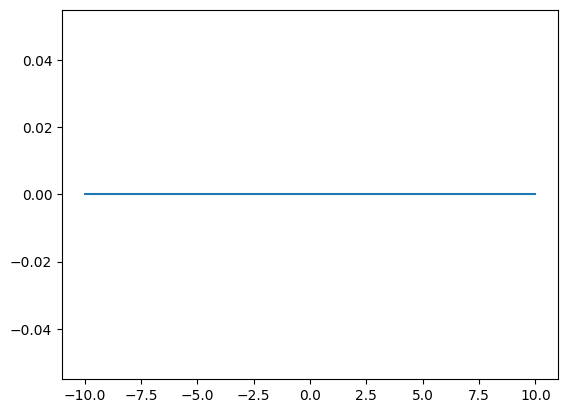

In [497]:
model.parameters["class0"]["var"][0][0]
x=x=np.linspace(-10,10,num=100)
gauss=norm(loc=0,scale=1e-5)
y=gauss.pdf(x)
plt.plot(x,y)

In [532]:
labels_predic=model.predict(features_matrix_test)
labels_predic

count_positive: 377
count_negative: 277
count_positive: 381
count_negative: 285
count_positive: 380
count_negative: 278
count_positive: 381
count_negative: 283
count_positive: 381
count_negative: 280
count_positive: 375
count_negative: 268
count_positive: 378
count_negative: 285
count_positive: 378
count_negative: 272
count_positive: 383
count_negative: 289


C:\Windows\Temp\ipykernel_10396\1429801191.py:103: RuntimeWarning: invalid value encountered in scalar divide
  p_positive_nomarlize=(p_positive)/(p_positive+p_negative)
C:\Windows\Temp\ipykernel_10396\1429801191.py:104: RuntimeWarning: invalid value encountered in scalar divide
  p_negative_nomarlize=(p_negative)/(p_positive+p_negative)


count_positive: 377
count_negative: 272
count_positive: 375
count_negative: 287
count_positive: 379
count_negative: 285
count_positive: 381
count_negative: 289
count_positive: 375
count_negative: 268
count_positive: 375
count_negative: 271
count_positive: 381
count_negative: 285
count_positive: 383
count_negative: 280
count_positive: 383
count_negative: 286
count_positive: 379
count_negative: 282
count_positive: 382
count_negative: 287
count_positive: 377
count_negative: 277
count_positive: 382
count_negative: 278
count_positive: 375
count_negative: 256
count_positive: 374
count_negative: 265
count_positive: 381
count_negative: 285
count_positive: 366
count_negative: 269
count_positive: 347
count_negative: 272
count_positive: 375
count_negative: 280
count_positive: 377
count_negative: 273
count_positive: 374
count_negative: 278
count_positive: 381
count_negative: 284
count_positive: 363
count_negative: 275
count_positive: 383
count_negative: 287
count_positive: 366
count_negative: 243


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [533]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(metrics.accuracy_score(labels_test,labels_predic))
print(confusion_matrix(labels_test,labels_predic))

0.5
[[130   0]
 [130   0]]


In [310]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
model_GaussianNB=GaussianNB()
model_GaussianNB.fit(features_matrix,labels)
labels_predic_GaussianNB=model_GaussianNB.predict(features_matrix_test)
print(metrics.accuracy_score(labels_test,labels_predic_GaussianNB))
print(confusion_matrix(labels_test,labels_predic_GaussianNB))

0.9346153846153846
[[116  14]
 [  3 127]]


### Checking Performance
The test set contains 130 spam emails and 130 non-spam emails. Please compute accuracy, recall, F-1 score to evaluate the performance of your spam filter.

In [9]:
########### Write Your Code Here ###########

############################################

accuracy: 0.5269230769230769
recall: 0.2230769230769231
f1: 0.32044198895027626


### Questions
1. Describe another real-world application where the naïve Bayes method can be applied
2. What are the strengths of the naïve Bayes method; when does it perform well?
3. What are the weaknesses of the naïve Bayes method; when does it perform poorly?
4. What makes the naïve Bayes method a good candidate for the classification problem, if you have enough knowledge about the data?